# Google Colab y Google Drive

En esta clase trabajaremos utilizando **Google Colab** como entorno de programación. Además, guardaremos y gestionaremos nuestros archivos a través de **Google Drive** y exploraremos cómo integrar proyectos con **GitHub** para un mejor control de versiones y colaboración.

## Objetivos

- Ejecutar notebooks en Google Colab.
- Montar Google Drive para guardar y acceder a archivos.
- Conectar Google Colab con repositorios de GitHub.

---

✅ **Recomendaciones iniciales:**
- Asegúrate de tener una cuenta activa de Google.
- Autoriza el acceso de Colab a tu Google Drive cuando se te solicite.
- Si aún no tienes cuenta en GitHub, crea una y familiarízate con su interfaz básica.


In [4]:
# Nos conectamos al Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import os

# Cambiar el directorio de trabajo
os.chdir('/content/drive/My Drive/UPAO/input')

# Mostrar el directorio actual de trabajo
print("Directorio actual:", os.getcwd())

# Listar todos los archivos y carpetas en el directorio actual
print("\nArchivos y carpetas en el directorio actual:")
print(os.listdir())

!ls "/content/drive/My Drive/UPAO/input"

Directorio actual: /content/drive/My Drive/UPAO/input

Archivos y carpetas en el directorio actual:
['enaho.dta']
enaho.dta


La siguiente tabla resume las mejores prácticas para elegir gráficos adecuados según el objetivo de análisis y la naturaleza de los datos. Esta selección es fundamental para representar la información de manera clara y efectiva, facilitando la interpretación de resultados.

| **Objetivo**                             | **Tipo de datos**               | **Gráficos recomendados**                                               |
| ---------------------------------------- | ------------------------------- | ----------------------------------------------------------------------- |
| Distribución de una variable             | Numérica continua o discreta    | Histograma, Densidad Kernel (KDE), Diagrama de cajas                    |
| Comparar categorías                      | Categórica vs. Numérica         | Diagrama de cajas, Diagrama de violín, Diagrama de barras               |
| Comparar valores según categoría         | Categórica nominal vs. Numérica | Diagrama de barras, Gráfico de conteo                                   |
| Tendencias temporales                    | Fecha + Variable numérica       | Gráfico de líneas                                                       |
| Correlación entre dos variables          | Dos variables numéricas         | Diagrama de dispersión, Mapa de calor (para múltiples variables)        |
| Relación entre dos variables categóricas | Dos variables categóricas       | Mapa de calor, Gráfico de conteo con diferenciación por tonalidad (hue) |


## Descripción de la base de datos

La base de datos que utilizaremos a continuación contiene información proveniente de la **Encuesta Nacional de Hogares (ENAHO)**, correspondiente a los módulos 200, 300 y 500, para el periodo 2011 - 2019. Esta base de datos permite realizar un análisis multidimensional de las características de los hogares peruanos a lo largo del tiempo.

- **Módulo 200: Características de los Miembros del Hogar**
  
  Incluye variables demográficas esenciales, tales como edad, sexo, parentesco con el jefe del hogar, estado civil y otros indicadores relevantes sobre la composición familiar.

- **Módulo 300: Educación**
  
  Proporciona información detallada sobre el nivel educativo alcanzado, asistencia escolar, rezago escolar, entre otros aspectos relacionados con la educación de los miembros del hogar.

- **Módulo 500: Empleo e Ingresos**
  
  Recoge datos sobre la condición de actividad, características del empleo principal y secundario, ingresos laborales y no laborales, permitiendo un análisis integral del mercado laboral y la situación económica de los hogares.

Esta base de datos constituye una herramienta robusta para el estudio de temas relacionados con desarrollo humano, pobreza, desigualdad, y dinámicas del mercado de trabajo en el Perú.


In [13]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Importar la base de datos ENAHO y asignarla al DataFrame 'df'
df = pd.read_stata("enaho.dta")

# Mostrar las primeras filas para verificar la correcta importación
df.head()


,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
0,2011,0061,077,11,010701,04,selva,"de 4,001 a 10,000 viviendas",2.011006e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,2.0,4.0,NaN,361.0,familiar,010000
1,2011,0110,112,11,010705,05,selva,Área de empadronamiento rural - aer compuesto,2.011011e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,9.0,400.0,familiar,010000
2,2011,0090,076,11,010205,03,selva,Área de empadronamiento rural - aer compuesto,2.011009e+14,nieto,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,36.0,484.0,familiar,010000
3,2011,0118,080,11,010401,03,selva,Área de empadronamiento rural - aer simple,2.011012e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,6.0,36.0,NaN,529.0,familiar,010000
4,2011,3408,066,11,010402,03,selva,Área de empadronamiento rural - aer compuesto,2.011341e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,0.0,400.0,familiar,010000


In [11]:
df['empresa']

,empresa
0,NaN
1,microempresa
2,microempresa
3,NaN
4,gran empresa
...,...
160767,NaN
160768,microempresa
160769,mediana empresa
160770,NaN


## Clasificación de empresas según el número de trabajadores contratados

A continuación, se presenta la clasificación empresarial basada en el tamaño de la empresa, determinada por la cantidad de trabajadores contratados:

- **Microempresas:** menos de 10 trabajadores.
- **Pequeñas empresas:** entre 10 y 20 trabajadores.
- **Medianas empresas:** entre 21 y 100 trabajadores.
- **Grandes empresas:** más de 100 trabajadores.

Esta clasificación es ampliamente utilizada en estudios económicos y análisis sectoriales para segmentar y comparar el comportamiento empresarial según su tamaño.

---


<ipython-input-29-bff207d7a16b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x = sns.countplot( x="empresa", data=df[df['year'] == "2019"], palette="pastel")


Text(0, 0.5, 'Número de Observaciones ')

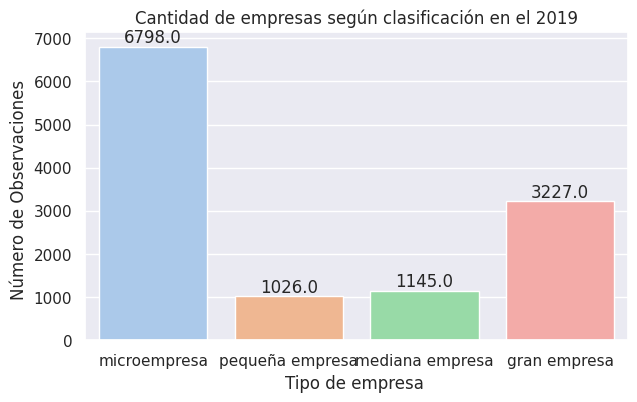

In [29]:
sns.set(style="darkgrid")
# sns.set(style="whitegrid")
# sns.set(style="white")
#figure size

fig, ax = plt.subplots( figsize=(7,4) )

x = sns.countplot( x="empresa", data=df[df['year'] == "2019"], palette="pastel")



# Iterar sobre las barras
for p in ax.patches:
    # Obtener la posición y la altura de la barra
    height = p.get_height()
    # Colocar el texto sobre la barra
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{}'.format(height), ha='center', va='bottom')

plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel('Tipo de empresa ')
plt.ylabel('Número de Observaciones ')

# ax.grid(False)

###### Gráfico de recuento vertical y un color (rojo)

Text(0, 0.5, 'Tipo de empresa')

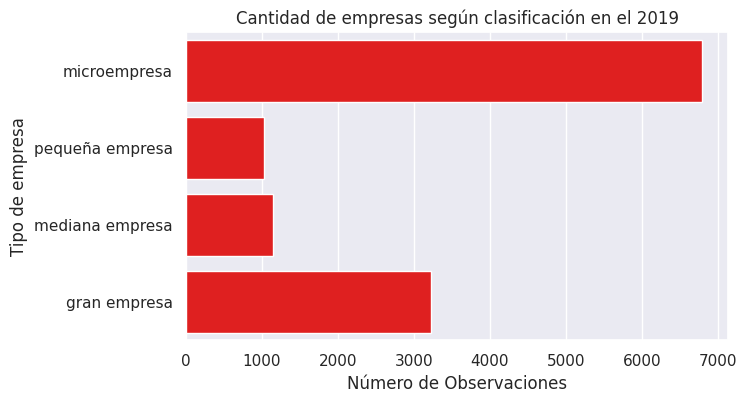

In [24]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(7,4))

x = sns.countplot(y = "empresa", data=df[df['year'] == "2019" ], color = 'red')

plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel('Número de Observaciones')
plt.ylabel('Tipo de empresa')

###### Evolutions of business in period 2017-2019

Text(0.01, 0.01, 'Fuente: Elboración propia - ENAHO (2011-2019)')

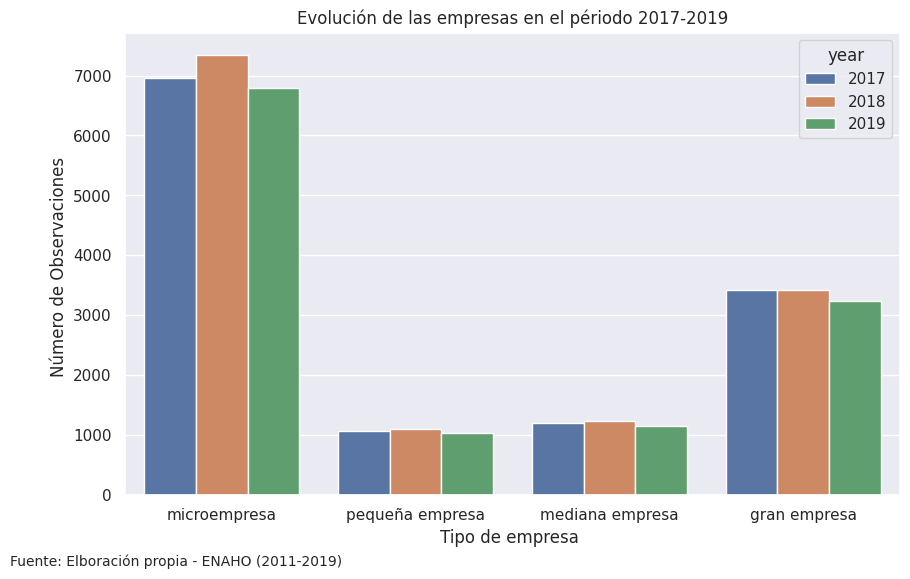

In [31]:
df2 = df[df['year'] > "2016" ]

fig, ax = plt.subplots(figsize=(10,6))

# hue: variable descomposition

ax = sns.countplot(x="empresa", hue="year", linewidth=1, data=df2)

plt.title('Evolución de las empresas en el périodo 2017-2019')
plt.xlabel('Tipo de empresa ')
plt.ylabel('Número de Observaciones ')

txt="Fuente: Elboración propia - ENAHO (2011-2019)"
plt.figtext(0.01, 0.01, txt, wrap=True, horizontalalignment='left', va="top", fontsize=10)


### Number of companies by strata (urbano o rural) and evolution by years

hue = split in groups but in the same graph <br>
col = create two new groups base in id group

In [32]:
df2.area

,area
103666,Urbana
103667,Rural
103668,Urbana
103669,Urbana
103670,Urbana
...,...
160767,Urbana
160768,Urbana
160769,Urbana
160770,Urbana


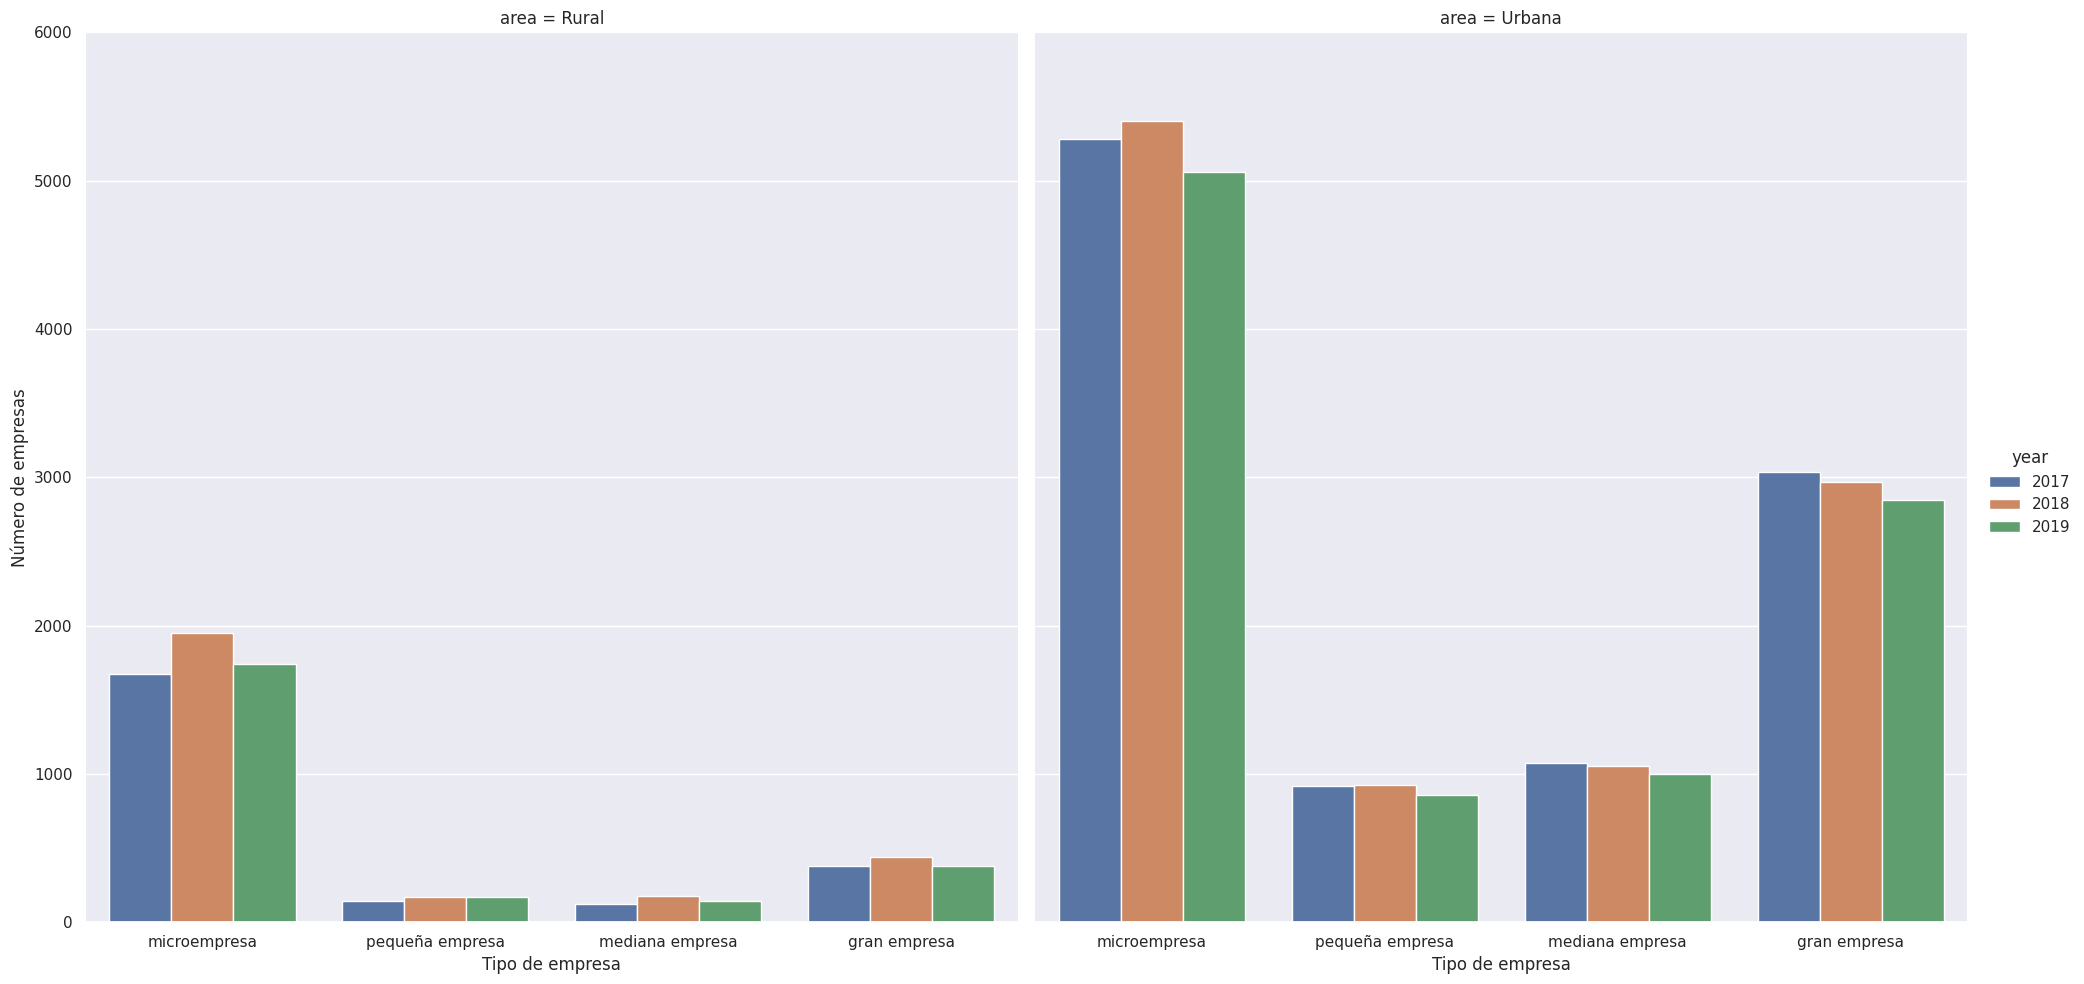

In [33]:
ag = sns.catplot(x="empresa", hue="year", col= "area" , data= df2, kind="count", height=10, aspect=1);

(ag.set_axis_labels("Tipo de empresa", "Número de empresas")
  .set(ylim=(0, 6000))
  .despine(left=True))

#### Number of businesses by strata - stacked bar plot

In [34]:
df['conglome']

,conglome
0,0061
1,0110
2,0090
3,0118
4,3408
...,...
160767,009703
160768,009675
160769,009703
160770,009700


In [35]:
df[df['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')

<ipython-input-35-b1ff9a668bff>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')


,empresa,area,num_firms
0,microempresa,Rural,1742
1,microempresa,Urbana,5056
2,pequeña empresa,Rural,169
3,pequeña empresa,Urbana,857
4,mediana empresa,Rural,145
5,mediana empresa,Urbana,1000
6,gran empresa,Rural,381
7,gran empresa,Urbana,2846


In [ ]:
# count businesses by strata using groubpy (similar collapse - stata)
#base_2 = enaho[ enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ], as_index = False )[['conglome'] ].count()
base_2 = enaho[ enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ] ).size().reset_index(name='num_firms')
base_2

In [ ]:
# stacked information
base_3 = base_2.pivot(index = 'empresa', columns = 'area', values = 'num_firms')
base_3

In [ ]:
base_3.columns

In [ ]:
base_3_2 = base_3.copy()

In [ ]:
base_3_2 = base_3_2[["Urbana", "Rural"]]
base_3_2

In [ ]:
base_3_2.plot( kind='bar', stacked=True, title='Empresa por estrato', color = ['blue', 'lightblue'] )
plt.xlabel(' ')

In [ ]:
base_3.plot( kind='bar', stacked=True, title='Empresa por estrato', color = ['blue', 'lightblue'] )
plt.xlabel(' ')

In [ ]:
axes = base_3.plot( kind='bar', rot=0, subplots=True, color = ['blue', 'lightblue'], title='Empresa por estrato')
plt.xticks(rotation=90)

## 2. Proportions

Understandable plots to show categorical variables. Use this plots to explain participations from categories.

### Pie

##### First at all, collapse dataframe to count categories of a variable

In [ ]:
base = enaho.groupby([ 'empresa' ]).count()
base

In [ ]:
# Labels to correct categories names

labels=['Microempresa','Pequeña empresa' , 'Mediana empresa', 'Gran empresa']

plt.figure(figsize=(5,5))

ax = plt.pie(base['conglome'], labels=labels, autopct='%.1f %%')
plt.title('Distribución de las empresas peruanas (2019)')
plt.show()

In [ ]:
enaho.labor

In [ ]:
base = enaho.groupby('labor').size()
base

In [ ]:
base = enaho.groupby('labor').size()
base.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Ocupaciones laborales")
plt.ylabel("")
plt.show()

In [ ]:
base = enaho.groupby('labor').size()
base.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%')  # Agregar el formato de porcentaje
plt.title("Ocupaciones laborales")
plt.ylabel("")
plt.show()

## Dona

In [ ]:
base2 = enaho.groupby([ 'sector' ]).count()

labels=['Agricultura y pesca','Minería','Manufactura','Construcción','Comercio','Transporte y telecomunicaciones', 'Finanzas', 'Servicios']
plt.figure(figsize=(10, 6))

ax = plt.pie(base2['conglome'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)

# centroid size and color

center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)

plt.title('Distribución de la mano de obra contratada por sector económico')

# Adding notes

txt="Elboración propia - ENAHO (2011-2019)"
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

plt.show()